In [7]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

#from matplotlib import rc
#from mpl_toolkits.mplot3d import axes3d
#from matplotlib import cm
#import matplotlib as mpl
#from tqdm import tqdm

# Ejemplo 14.3 

La ecuación diferencia del problema es 
$$-\frac{d}{dx}\left[(x+1)\frac{du}{dx}\right] = 1$$

Primero discretizamos el espacio en $n$ partes y construimos los "mesh points" $x_j = j\frac{l}{n} = jh, j = 0, \dots, n$. Ahora consideramos las $n-1$ funciones base $\varphi_{j}$ ya descritas por el método. Recordando que la solución al método corresponde a encontrar el $c$ tal que 
 $$Mc = b$$
 donde $M$ y $b$ para este problema corresponden a
 $$M_{ij} = \int_0^l (x+1) \varphi'_i\varphi'_jdx  \ \ \ ;  \ \ \  b_i =  \int_0^l \varphi_i dx$$

Usando las siguientes definiciones de $\varphi_j:$
$$\varphi_j = \begin{cases}
               \frac{1}{h}(x-x_{j-1}) & x_{j-1} \leq x \leq x_{j}\\
               \frac{1}{h}(x_{j+1} - x) & x_{j} \leq x \leq x_{j+1}\\
               0 & \text{else}
               \end{cases}$$
               
Por lo tanto, $M$ y $b$ se reducen a
$$M_{ij} = \begin{cases}
               -\frac{1}{h^2}[ h + h^2 \left(i + \frac{1}{2}\right)] & j = i+1\\
               -\frac{1}{h^2}[ h + h^2 \left(j + \frac{1}{2}\right)] & i = j+1\\
               \frac{2}{h^2}[ jh^2 + h] &  i = j \\
               0 & |i-j| > 1
               \end{cases}$$
               
$$b_i = h $$

Considerando esto, construimos $b$ y $M$ para encontrar $c$

In [120]:

## Construcción de M y b usando lo derivado analíticamente
def SolExacta(x):
    return (-x + (np.log(x+1))/(np.log(2)))

def fin_elem_1d(n,h):
    b = np.zeros([n-1])
    M = np.zeros([n-1,n-1])
    mesh = np.linspace(0,1, n+1)
    for i in range(n-1):
        b[i] = h
        M[i,i] = 2*(i+1) + 2/h
        for j in range(n-1):
            if (np.abs(i-j) == 1):
                k = min(i,j) + 1
                M[i,j] =  -(k + 0.5) -1/h
    return np.linalg.inv(M)@b, mesh, M, b

#Este código retorna los coeficientes c_i 

<IPython.core.display.Javascript object>


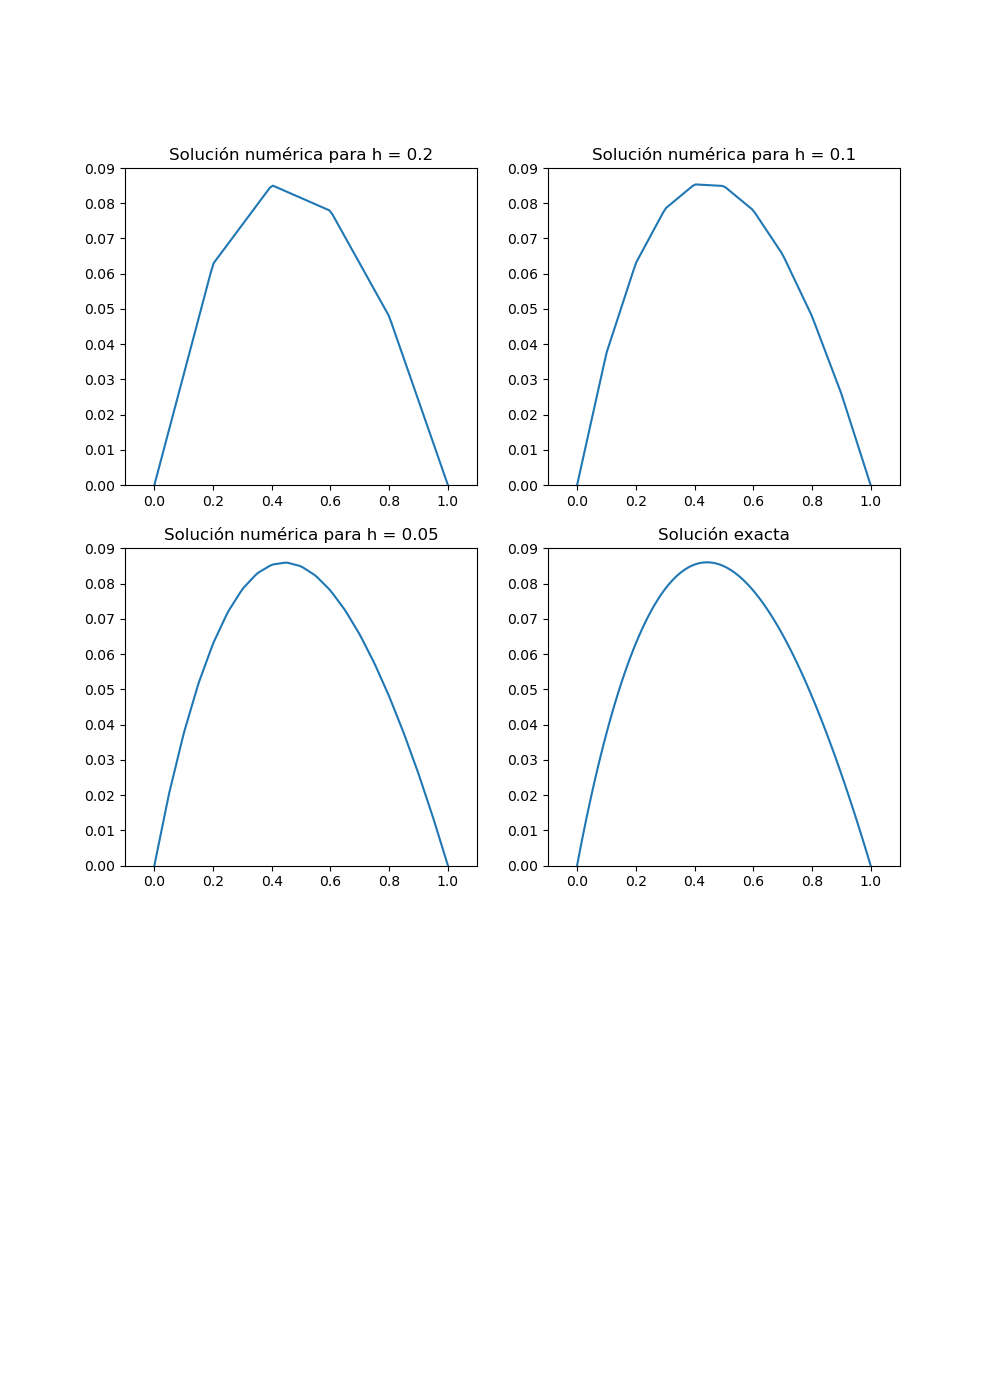

(0.0, 0.09)

In [128]:
#Ahora graficamos los resultados, para n = [5, 10, 20], h = [0.2, 0.1, 0.05] 

#Esta función calcula los phi_j en un punto x.
def phi(i, mesh, x, h):
    xant, xac, xsig, = mesh[i-1], mesh[i], mesh[i+1]
    xac = mesh[i]
    rta = 0
    #Ya conocemos cual phi_i es, ahora usamos la definición
    if(xant <= x <= xac):
        rta = (x-xant)/h
    elif(xac <= x <= xsig):
        rta = (xsig-x)/h
    
    return rta
        
def approx(c, mesh, x, h):
    Phi = np.array([phi(i+1, mesh, x, h) for i in range(len(c))])
    
    return c@Phi #Valor de la aproximación en x

valh = [0.2, 0.1, 0.05]
valn = [5, 10, 20]
t = np.linspace(0.,1,100) #Puntos muestrales para solución exacta


fig = plt.figure(figsize=(10,14))
for i in range(len(valh)):
    ax = fig.add_subplot(3,2,i+1)
    h, n = valh[i], valn[i] 
    c, mesh, M, b = fin_elem_1d(n,h)
    uapprox = np.array([approx(c, mesh, x, h) for x in t])
    phi1= [phi(1, mesh, x, h) for x in t]
    ax.plot(t, uapprox)
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(0, 0.09)
    ax.set_title("Solución numérica para h = {}".format(h))
ax = fig.add_subplot(3,2,4)
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(0, 0.09)
ax.plot(t, SolExacta(t))
ax.set_title("Solución exacta")
